***
# Zastosowania DFT
***
## Mateusz Powęska
***
## Zadanie 1 Analiza obrazów
***

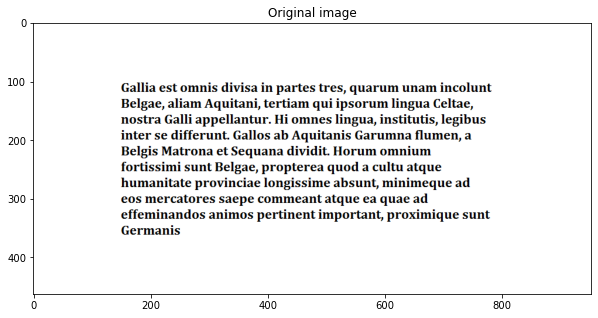

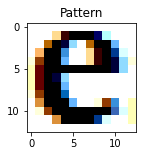

Number of patterns: 43


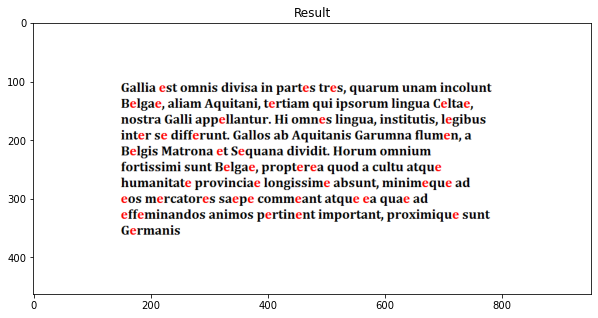

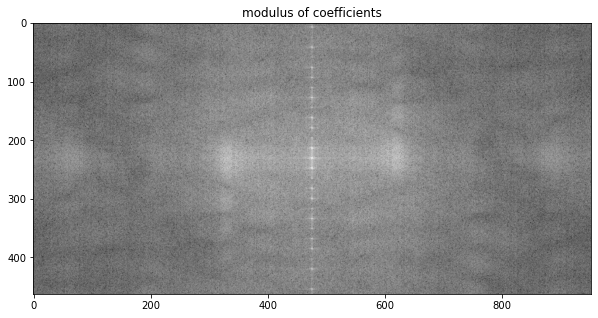

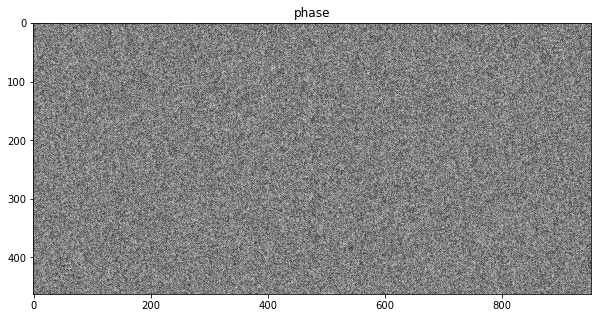

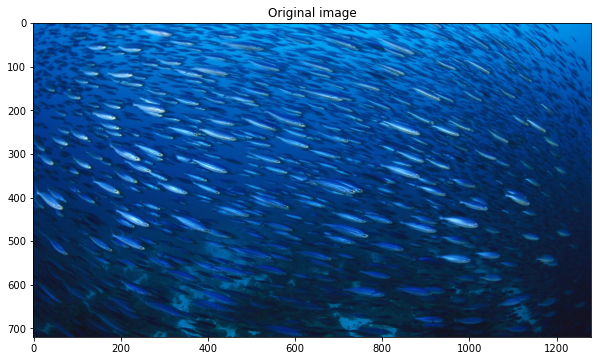

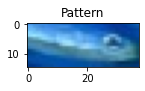

Number of patterns: 6695


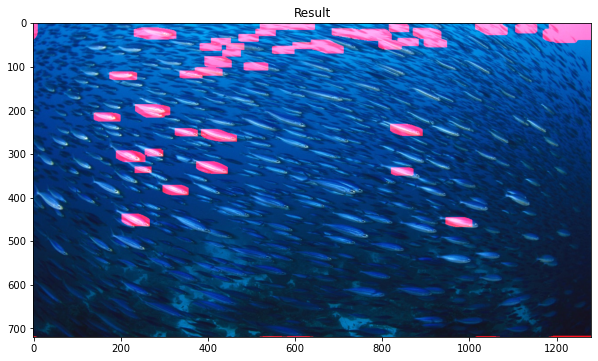

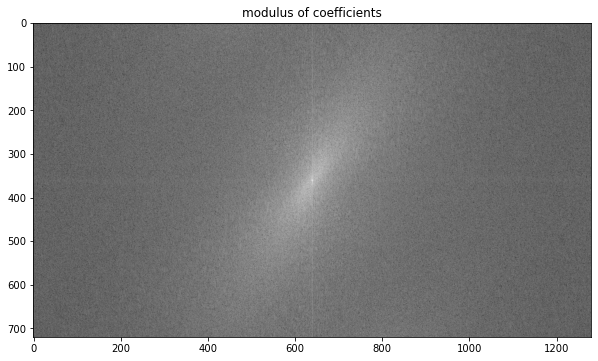

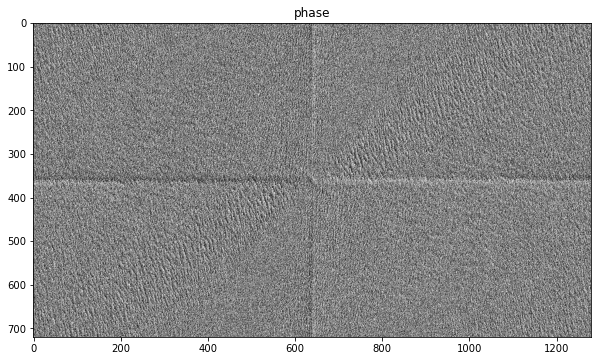

In [254]:
from numpy.fft import ifft2
from matplotlib import pyplot as plt
from PIL import ImageOps
import numpy as np

FISH_PATTERN_PATH = "data/Lab9_fish1.png"
FISHES_IMG_PATH = "data/Lab9_school.jpg"
GALIA_IMG_PATH = "data/Lab9_galia.png"
GALIA_PATTERN_PATH = "data/Lab9_galia_e.png"
R_CONST = 255
LEVEL = 280


def change_contrast(img, level):
    factor = (259 * (level + 255)) / (255 * (259 - level))

    def contrast(c):
        return 128 + factor * (c - 128)

    return img.point(contrast)


def convert_img_to_array(path, contrast=False):
    image = Image.open(path)
    before_changed_contrast = image
    if contrast:
        image = change_contrast(image, LEVEL)
    rgb_array = image.load()
    converted_image = image.convert("L")
    converted_image = ImageOps.invert(converted_image)

    return image, np.array(converted_image), rgb_array, before_changed_contrast


def show_image(image, title, size=(10, 10)):
    plt.figure(figsize=size)
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.show()


def calculate_dft(image, pattern, width, height, coff):
    fourier_image = np.fft.fft2(image)
    fourier_pattern = np.fft.fft2(np.rot90(pattern, 2), s=(width, height))

    C = np.real(np.fft.ifft2(np.multiply(fourier_image, fourier_pattern)))

    min_val = coff * (np.max(C) - np.min(C)) + np.min(C)

    return C, min_val


def prepare_result_plot(C, rgb_array, min_val, pattern_w, pattern_h):
    cnt = 0
    C[C < min_val] = 0
    for x, y in np.argwhere(C >= min_val):
        cnt += 1
        for width in range(pattern_w):
            for height in range(pattern_h):
                r, g, b = rgb_array[y - height, x - width]
                rgb_array[y - height, x - width] = (r + R_CONST, g, b)

    return cnt


def run_and_show_result(path_to_img, path_to_pattern, coff, contrast=False):
    pattern, converted_pattern, _, _ = convert_img_to_array(path_to_pattern, contrast)
    pattern_2, _, _, _ = convert_img_to_array(path_to_pattern)
    image, converted_image, rgb_array, before_changed_contrast = convert_img_to_array(path_to_img, contrast)
    image_2, converted_image_2, rgb_array_2, before_changed_contrast_2 = convert_img_to_array(path_to_img)

    image_w, image_h = converted_image.shape
    pattern_w, pattern_h = converted_pattern.shape

    show_image(image_2, "Original image")
    show_image(pattern_2, "Pattern", size=(2, 2))

    C, min_val = calculate_dft(converted_image, converted_pattern, image_w, image_h, coff)
    patterns_number = prepare_result_plot(C, rgb_array_2, min_val, pattern_w, pattern_h)

    print(f"Number of patterns: {patterns_number}")
    show_image(image_2, "Result")

    coefficients = np.fft.fftshift(np.fft.fft2(converted_image))
    phase = np.angle(coefficients)

    show_image(np.absolute(np.log(coefficients)), "modulus of coefficients")
    show_image(phase, "phase")


run_and_show_result(GALIA_IMG_PATH, GALIA_PATTERN_PATH, 0.99)
run_and_show_result(FISHES_IMG_PATH, FISH_PATTERN_PATH, 0.7, contrast=True)

W przypadku ilustracji "galia" wykrywanie wzorca za pomocą DFT wypadło bardzo dobrze. Każda litera "e" została wykryta. Spowodowane jest to kolorystyką obrazu, który jest czarno-biały. Na pozytywny wynik analizy obrazu miał również wpływ kształt wzorca - żadne inne litery nie były na tyle podobne do szukanego wzorca, żeby mógł wystąpić błąd. Program wykrył 43 przypadki wystąpienia wzorca, co jest prawidłowym wynikiem.

Wykrywanie wzorca na ilustracji "school" nie dało tak dobrych wyników jak w poprzednim przykładzie. Spowodowane było to małym kontrastem na obrazie i kolorystyką. Dla zwiększenia kontrastu użyłem zaimplemetnowanej funkcji `change_contrast`, co trochę poprawiło wyniki. Ostatecznie udało się wykryć część elementów. Ze względu na nachodzenie się wzorców oraz kolorystykę liczenie wykrytych przypadków nie jest prawidłowe.

***
## Zadanie 2 OCR
***

Sans serif fonts


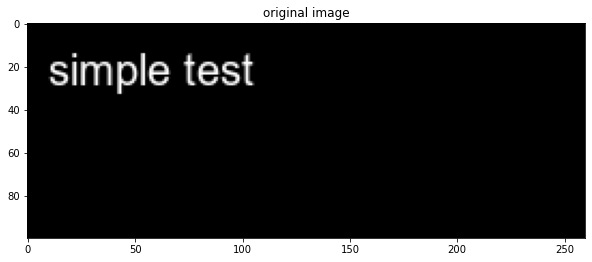

Result:
simple test
{'s': 2, 'i': 1, 'm': 1, 'p': 1, 'l': 1, 'e': 2, ' ': 1, 't': 2}
accuracy:  100.0


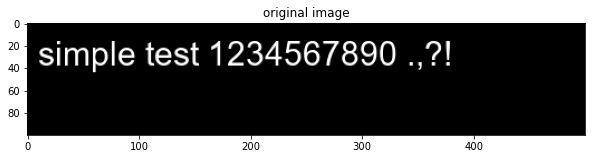

Result:
simple test1234567890 .,?!
{'s': 2, 'i': 1, 'm': 1, 'p': 1, 'l': 1, 'e': 2, ' ': 2, 't': 2, '1': 1, '2': 1, '3': 1, '4': 1, '5': 1, '6': 1, '7': 1, '8': 1, '9': 1, '0': 1, '.': 1, ',': 1, '?': 1, '!': 1}
accuracy:  96.3


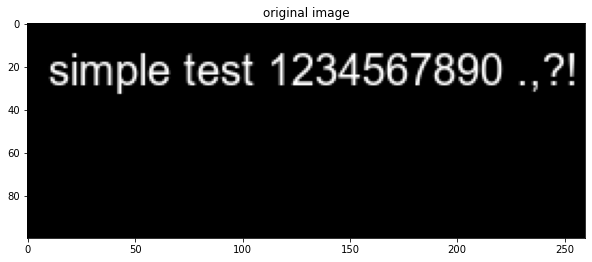

Result:
simple test 1234567890 .,?!
{'s': 2, 'i': 1, 'm': 1, 'p': 1, 'l': 1, 'e': 2, ' ': 3, 't': 2, '1': 1, '2': 1, '3': 1, '4': 1, '5': 1, '6': 1, '7': 1, '8': 1, '9': 1, '0': 1, '.': 1, ',': 1, '?': 1, '!': 1}
accuracy:  100.0


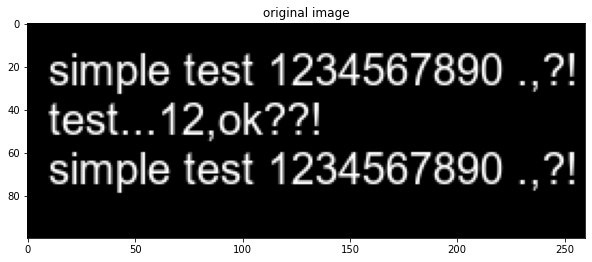

Result:
simple test 1234567890 .,?!
test...12,ok??!
simple test 1234567890 .,?!
{'s': 5, 'i': 2, 'm': 2, 'p': 2, 'l': 2, 'e': 5, ' ': 6, 't': 6, '1': 3, '2': 3, '3': 2, '4': 2, '5': 2, '6': 2, '7': 2, '8': 2, '9': 2, '0': 2, '.': 5, ',': 3, '?': 4, '!': 3, '\n': 2, 'o': 1, 'k': 1}
accuracy:  100.0



Serif fonts


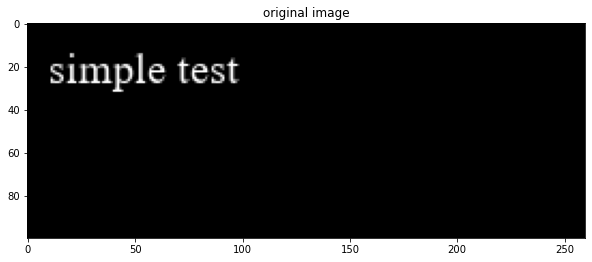

Result:
. , ,
,.., . .
{'.': 5, ' ': 4, ',': 4, '\n': 1}
accuracy:  9.09


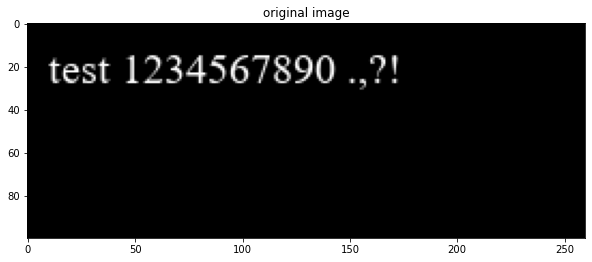

Result:
,, , ,, , , , , . ,.. , ,...., . ,.
. , ,. ,.. ,,
{',': 19, ' ': 16, '.': 13, '\n': 1}
accuracy:  20.0


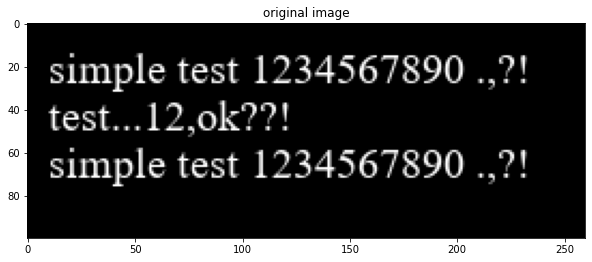

Result:
.
. ,
.
. ,
{'.': 4, '\n': 3, ' ': 2, ',': 2}
accuracy:  14.08


In [259]:
import string
from PIL import Image, ImageDraw, ImageFont
from collections import Counter

IMAGE_WIDTH = 260
IMAGE_HEIGHT = 100
ALPHABET = string.ascii_letters + string.digits + '.,?!'


def generate_and_save_text(message, path, width, height, font="arial.ttf", font_size=20):
    txt_path = path[:-4] + ".txt"
    with open(txt_path, 'w') as f:
        f.writelines(message)

    font = ImageFont.truetype(font, size=font_size)
    img = Image.new('RGB', (width, height), color='white')
    img_draw = ImageDraw.Draw(img)
    img_draw.text((10, 10), message, font=font, fill=(0, 0, 0))
    img.save(path)


def prepare_pattern(font, letter):
    pattern_w, pattern_h = font.getsize(letter)
    pat_img = Image.new('RGB', (pattern_w, pattern_h), color='white')
    ImageDraw.Draw(pat_img).text((0, 0), letter, font=font, fill='black')
    pattern = pat_img.convert('L')
    pattern = ImageOps.invert(pattern)
    return np.array(pattern), pattern_w, pattern_h


def get_result(result, font):
    space_w, space_h = font.getsize(' ')
    n = len(result)
    result_text = result[0][0]

    for i in range(1, n):
        let, x, y, w, h = result[i]
        let_prev, x_prev, y_prev, w_prev, h_prev = result[i - 1]
        if x != x_prev:
            result_text += "\n" + let
        elif abs(y - w - y_prev) >= space_w:
            result_text += " " + let
        else:
            result_text += let

    return result_text


def ocr(path_to_img, min_val=10 ** (-5), font="arial.ttf", font_size=20, image_width=260, image_height=100):
    image = Image.open(path_to_img)
    image = image.convert("L")
    image = ImageOps.invert(image)
    image = np.array(image)
    fourier_image = np.fft.fft2(image)

    result = []
    font = ImageFont.truetype(font, size=font_size)

    char_w, char_h = font.getsize('a')

    for letter in ALPHABET:
        pattern, pattern_w, pattern_h = prepare_pattern(font, letter)
        C_pattern = np.max(np.real(np.fft.ifft2(np.multiply(np.fft.fft2(pattern), np.fft.fft2(np.rot90(pattern, 2))))))
        C = np.abs(np.real(np.fft.ifft2(
            np.multiply(fourier_image,
                        np.fft.fft2(np.rot90(pattern, 2), s=(image_height, image_width))))) / C_pattern - 1.0)

        for x, y in np.argwhere(C < min_val):
            result.append((letter, (x - 2) // char_w, y, pattern_w, pattern_h))

    result.sort(key=lambda tup: tup[2])
    result.sort(key=lambda tup: tup[1])

    show_image(image, "original image")

    result = get_result(result, font)
    counter = dict(Counter(list(zip(*result))[0]))

    accuracy = calculate_accuracy(path_to_img, counter)

    print("Result:")
    print(result)
    print(counter)
    print("accuracy: ", accuracy)


def calculate_accuracy(path_to_img, result_dict):
    txt_path = path_to_img[:-4] + ".txt"
    text_file = open(txt_path, "r")
    expected_result = text_file.read()
    expected_result = {e: expected_result.count(e) for e in set(expected_result)}
    text_file.close()

    cnt = 0
    for key in expected_result.keys():
        if key in result_dict:
            cnt += min(result_dict[key], expected_result[key])

    return round((cnt / sum(expected_result.values())) * 100, 2)


# generate_and_save_text("simple test", "data/test1.png", IMAGE_WIDTH, IMAGE_HEIGHT)
# generate_and_save_text("simple test 1234567890 .,?!", "data/test2.png", 500, IMAGE_HEIGHT,font_size=30)
# generate_and_save_text("simple test 1234567890 .,?!", "data/test2.1.png", IMAGE_WIDTH, IMAGE_HEIGHT)
# generate_and_save_text("simple test 1234567890 .,?!\ntest...12,ok??!\nsimple test 1234567890 .,?!",
#                        "data/test3.png", IMAGE_WIDTH, IMAGE_HEIGHT)
#
# generate_and_save_text("simple test", "data/test4.png", IMAGE_WIDTH, IMAGE_HEIGHT, "times.ttf")
# generate_and_save_text("test 1234567890 .,?!", "data/test5.png", IMAGE_WIDTH, IMAGE_HEIGHT, "times.ttf")
# generate_and_save_text("simple test 1234567890 .,?!\ntest...12,ok??!\nsimple test 1234567890 .,?!",
#                        "data/test6.png", IMAGE_WIDTH, IMAGE_HEIGHT, "times.ttf")

print("Sans serif fonts")
ocr("data/test1.png")
ocr("data/test2.png", font_size=30, image_width=500)
ocr("data/test2.1.png")
ocr("data/test3.png")

print("\n\n\nSerif fonts")
ocr("data/test4.png", min_val=0.01)
ocr("data/test5.png", min_val=0.02)
ocr("data/test6.png", min_val=0.0018)

Program bardzo dobrze radzi sobie w przypadku czcionek bezszeryfowych. W 4 przykładach testowych tekst został odczytany z dokładnością równą prawie 100%. Z przedstawionych rezultatów wynika, że długość tekstu nie ma znaczenia przy analizie obrazu, jedynie rozmiar czcionki czasem negatywnie wpływa na odczyt białych znaków.
W sytacji z czcionką szeryfową wyniki wyglądają znacznie gorzej - tekst nie jest poprawnie odczytywany. Wpływ mogą mieć na to źle dobrane parametry.